In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_bookings = pd.read_csv(r"C:\Users\Bhavya\Downloads\fact_bookings.csv")
df_date = pd.read_csv(r"C:\Users\Bhavya\Downloads\dim_date.csv")
df_hotels = pd.read_csv(r"C:\Users\Bhavya\Downloads\dim_hotels.csv")
df_rooms = pd.read_csv(r'C:\Users\Bhavya\Downloads\dim_rooms.csv')
df_agg_bookings = pd.read_csv(r'C:\Users\Bhavya\Downloads\fact_aggregated_bookings.csv')

In [3]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [5]:
df_bookings.shape

(134590, 12)

In [7]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [12]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [13]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [14]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: ylabel='booking_platform'>

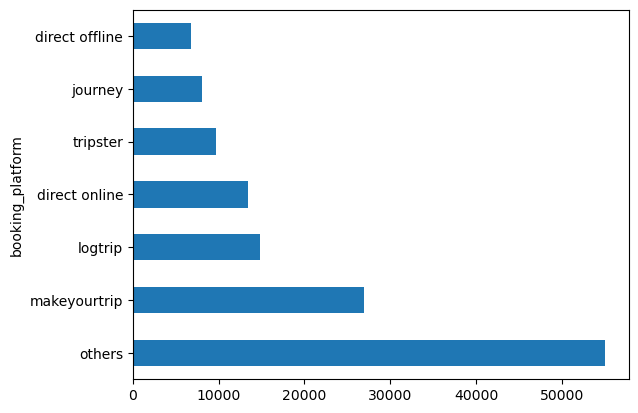

In [16]:
df_bookings.booking_platform.value_counts().plot(kind='barh')

In [17]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [18]:
df_bookings.revenue_generated.max()

45220

In [19]:
df_bookings.revenue_generated.min()

6500

In [20]:
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


In [21]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [22]:
df_hotels.shape

(25, 4)

In [23]:
df_hotels.city.unique()

array(['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore'], dtype=object)

In [25]:
df_hotels.property_id.unique()

array([16558, 16559, 16560, 16561, 16562, 16563, 17558, 17559, 17560,
       17561, 17562, 17563, 18558, 18559, 18560, 18561, 18562, 18563,
       19558, 19559, 19560, 19561, 19562, 19563, 17564], dtype=int64)

In [26]:
df_hotels.property_name.value_counts()

property_name
Atliq Grands     4
Atliq Exotica    4
Atliq City       4
Atliq Blu        4
Atliq Bay        4
Atliq Palace     4
Atliq Seasons    1
Name: count, dtype: int64

In [27]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='city'>

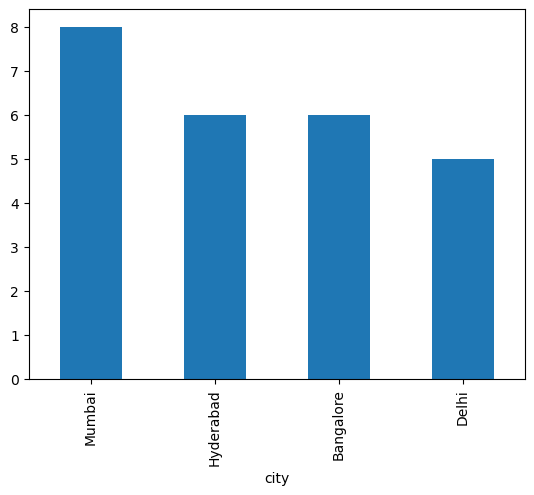

In [31]:
df_hotels.city.value_counts().plot(kind='bar')

In [32]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [33]:
df_agg_bookings.shape

(9200, 5)

In [34]:
df_agg_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [36]:
df_agg_bookings.capacity.unique()

array([30, 19, 40, 26, 34, 18, 31, 41, 32, 20, 25, 15, 42, 33, 38, 27, 24,
       36, 16, 23, 29, 50, 43, 22, 39, 44, 45, 21,  8,  3,  6,  7, 10, 13,
        9, 17, 14,  4], dtype=int64)

In [37]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [43]:
#### Total bookings

total_bookings=df_agg_bookings.groupby('property_id').successful_bookings.sum().reset_index()
total_bookings


,property_id,successful_bookings
0,16558,3153
1,16559,7338
2,16560,4693
3,16561,4418
4,16562,4820
5,16563,7147
6,17558,5036
7,17559,6142
8,17560,6013
9,17561,5183


In [59]:
over_booked=df_agg_bookings[df_agg_bookings['successful_bookings']>df_agg_bookings['capacity']].reset_index()

In [66]:
df_agg_bookings['successful_bookings'].max()

43

In [67]:
df_agg_bookings['capacity'].max()

50

In [73]:
##### Property with the highest capacity
df_agg_bookings.groupby('property_id')['capacity'].max().sort_values(ascending =False)

property_id
17558    50
19563    45
19561    45
17560    45
18559    44
17563    44
16562    43
19559    41
16563    41
16559    41
19558    40
18561    40
18560    40
17564    40
17559    39
18562    38
19560    38
17561    36
16560    34
18558    30
17562    30
19562    30
18563    29
16561    24
16558    22
Name: capacity, dtype: int64

In [75]:
df_bookings.shape

(134590, 12)

In [76]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [78]:
df_bookings.groupby('booking_platform')['revenue_generated'].sum().sort_values(ascending=False)

booking_platform
others            821066620
makeyourtrip      401502130
logtrip           219478955
direct online     198770030
tripster          144714510
journey           120654715
direct offline    101359255
Name: revenue_generated, dtype: int64

In [82]:
bookings=df_bookings[df_bookings['no_guests']>0]
bookings.shape

(134590, 12)

In [83]:
df_bookings['revenue_generated'].min()

6500

In [84]:
df_bookings.
revenue_generated.max()

45220

In [86]:
df_bookings.revenue_generated.mean()

14916.013188201203

In [88]:
df_agg_bookings[df_agg_bookings['capacity'].isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity


In [93]:
df_agg_bookings["occ_pct"] = (df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]).apply(lambda x : round(x*100,2))
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30,83.33
1,19562,01-May-22,RT1,28,30,93.33
2,19563,01-May-22,RT1,23,30,76.67
3,17558,01-May-22,RT1,13,19,68.42
4,16558,01-May-22,RT1,18,19,94.74


In [91]:
#### Average occupancy rate in each of the room category
df_agg_bookings.groupby('room_category')['occ_pct'].mean().round(2)

room_category
RT1    57.92
RT2    58.01
RT3    58.03
RT4    59.28
Name: occ_pct, dtype: float64

In [94]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [95]:
df=pd.merge(df_agg_bookings,df_rooms, left_on='room_category',right_on='room_id')

In [96]:
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,01-May-22,RT1,25,30,83.33,RT1,Standard
1,19562,01-May-22,RT1,28,30,93.33,RT1,Standard
2,19563,01-May-22,RT1,23,30,76.67,RT1,Standard
3,17558,01-May-22,RT1,13,19,68.42,RT1,Standard
4,16558,01-May-22,RT1,18,19,94.74,RT1,Standard
...,...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18,72.22,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18,72.22,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6,50.00,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6,50.00,RT4,Presidential


In [97]:
df.drop('room_category',axis=1,inplace=True)

In [99]:
df.tail()

,property_id,check_in_date,successful_bookings,capacity,occ_pct,room_id,room_class
9195,16563,31-Jul-22,13,18,72.22,RT4,Presidential
9196,16559,31-Jul-22,13,18,72.22,RT4,Presidential
9197,17558,31-Jul-22,3,6,50.00,RT4,Presidential
9198,19563,31-Jul-22,3,6,50.00,RT4,Presidential
9199,17561,31-Jul-22,3,4,75.00,RT4,Presidential


In [101]:
df.groupby('room_class')['occ_pct'].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.92
Name: occ_pct, dtype: float64

In [102]:
###average occupancy rate per city
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [104]:
df1=pd.merge(df_agg_bookings,df_hotels, on='property_id')

In [105]:
df1

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city
0,16559,01-May-22,RT1,25,30,83.33,Atliq Exotica,Luxury,Mumbai
1,16559,01-May-22,RT2,35,41,85.37,Atliq Exotica,Luxury,Mumbai
2,16559,01-May-22,RT3,27,32,84.38,Atliq Exotica,Luxury,Mumbai
3,16559,01-May-22,RT4,17,18,94.44,Atliq Exotica,Luxury,Mumbai
4,16559,02-May-22,RT1,20,30,66.67,Atliq Exotica,Luxury,Mumbai
...,...,...,...,...,...,...,...,...,...
9195,18560,30-Jul-22,RT4,9,15,60.00,Atliq City,Business,Hyderabad
9196,18560,31-Jul-22,RT1,22,30,73.33,Atliq City,Business,Hyderabad
9197,18560,31-Jul-22,RT2,34,40,85.00,Atliq City,Business,Hyderabad
9198,18560,31-Jul-22,RT3,17,24,70.83,Atliq City,Business,Hyderabad


<Axes: xlabel='city'>

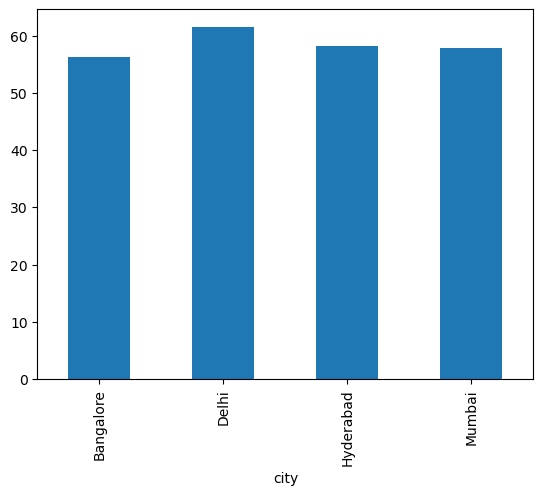

In [108]:
df1.groupby('city')['occ_pct'].mean().round(2).plot(kind='bar')

<Axes: ylabel='count'>

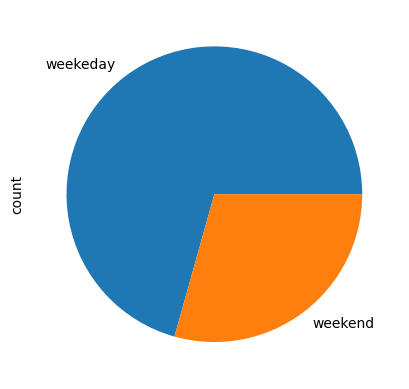

In [115]:
### when is the better occupancy weekday or weekend
df_date.day_type.value_counts().plot(kind='pie')

In [113]:
df2=pd.merge(df1,df_date,left_on='check_in_date',right_on='date')

In [114]:
df2

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city,date,mmm yy,week no,day_type
0,16559,01-May-22,RT1,25,30,83.33,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
1,16559,01-May-22,RT2,35,41,85.37,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
2,16559,01-May-22,RT3,27,32,84.38,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
3,16559,01-May-22,RT4,17,18,94.44,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
4,19562,01-May-22,RT1,28,30,93.33,Atliq Bay,Luxury,Bangalore,01-May-22,May 22,W 19,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,17564,31-Jul-22,RT4,10,17,58.82,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend
9196,18560,31-Jul-22,RT1,22,30,73.33,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
9197,18560,31-Jul-22,RT2,34,40,85.00,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
9198,18560,31-Jul-22,RT3,17,24,70.83,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend


In [130]:
##### Occupancy for different cities in month of june
df2[df2['mmm yy']=='Jun 22'].groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)



city
Delhi        61.46
Mumbai       57.79
Hyderabad    57.69
Bangalore    55.85
Name: occ_pct, dtype: float64

Text(0.5, 1.0, 'Occupancy for different cities in month of june')

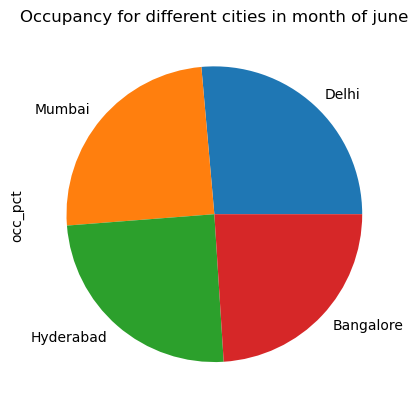

In [138]:
df2[df2['mmm yy']=='Jun 22'].groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False).plot(kind='pie')
plt.title('Occupancy for different cities in month of june')


In [143]:
#### Revenue realised per city
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


In [144]:
df_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [145]:
df3=pd.merge(df_bookings,df_hotels,on='property_id')

In [146]:
df3

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760,Atliq Seasons,Business,Mumbai
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


In [150]:
df3.groupby('city')['revenue_generated'].sum().sort_values(ascending=False)

city
Mumbai       784865350
Bangalore    494828175
Hyderabad    381400850
Delhi        346451840
Name: revenue_generated, dtype: int64

In [151]:
##### Month By Month Revenue
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [154]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [156]:
df_date['date']=pd.to_datetime(df_date['date'],format='mixed')

In [157]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [160]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  object        
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  object        
 5   no_guests          134590 non-null  int64         
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      56683 non-null   float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 12.3+ MB


In [159]:
df_bookings['check_in_date']=pd.to_datetime(df_bookings['check_in_date'],format='mixed')

In [162]:
df_bookings['check_in_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 134590 entries, 0 to 134589
Series name: check_in_date
Non-Null Count   Dtype         
--------------   -----         
134590 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.0 MB


In [165]:
df4=pd.merge(df_bookings,df_date,left_on='check_in_date',right_on='date',suffixes=(" ","_date"))

In [166]:
df4

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,2022-05-01,May 22,W 19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,2022-05-01,May 22,W 19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,2022-05-01,May 22,W 19,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,2022-05-01,May 22,W 19,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,2022-05-01,May 22,W 19,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300,2022-07-31,Jul 22,W 32,weekend
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760,2022-07-31,Jul 22,W 32,weekend
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920,2022-07-31,Jul 22,W 32,weekend
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300,2022-07-31,Jul 22,W 32,weekend


<Axes: xlabel='mmm yy'>

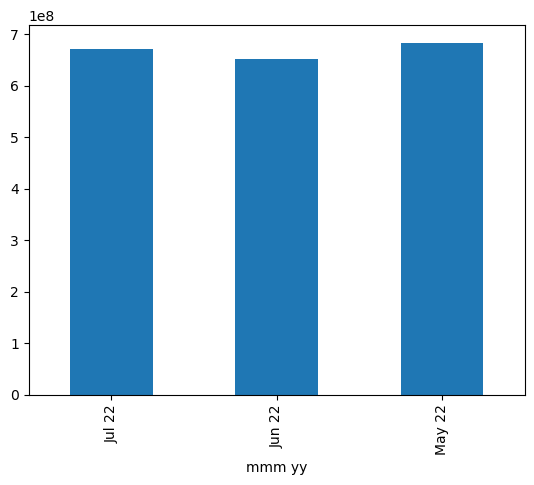

In [169]:
df4.groupby('mmm yy')['revenue_generated'].sum().plot(kind='bar')

<Axes: ylabel='property_name'>

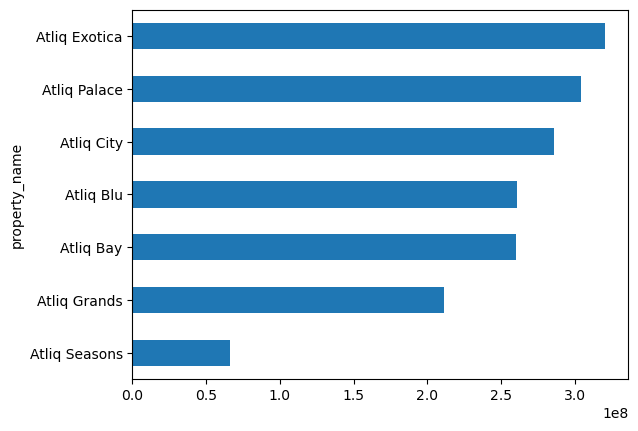

In [174]:
####Revenue realised per hotel type
df3.groupby('property_name')['revenue_realized'].sum().sort_values().plot(kind='barh')

In [177]:
#### Average Rating per city
df3.groupby('city')['ratings_given'].mean().round(2)

city
Bangalore    3.41
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Name: ratings_given, dtype: float64

<Axes: ylabel='revenue_realized'>

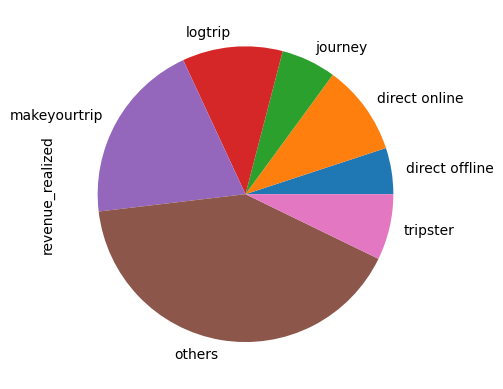

In [180]:
#### Revenue realized per booking platform
df4.groupby('booking_platform')['revenue_realized'].sum().plot(kind='pie')
